In [ ]:
# In the name of God
# Mohammad Hossein Zehtab
# MFTN - Data Analysis
# 2nd Project: Fish Exploratory Data Analysis

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings(action = "ignore")

# Notebook Setting
sns.set()

# Reading Dataset

In [55]:
df = pd.read_csv("Fish_Weight_One_Hot_Encoding.csv")

In [56]:
df.shape

(42, 4)

In [57]:
df.sample(5)

,Species,Weight,Height,Width
31,Pike,300.0,5.7078,4.1580
7,Roach,69.0,5.2983,2.8217
36,Smelt,6.7,1.7388,1.0476
27,Perch,51.5,4.5924,2.6316
25,Perch,32.0,3.5280,1.9992


# Data Preprocassing

In [58]:
# Column renaming
dict = {
    "Weight" : "weight",
    "Height" : "height",
    "Width" : "width",
    "Species" : "species"
        }
df = df.rename(columns = dict)

In [59]:
df.sample(5)

,species,weight,height,width
13,Whitefish,270.0,8.1454,4.2485
36,Smelt,6.7,1.7388,1.0476
28,Perch,70.0,4.5880,2.9415
8,Roach,78.0,5.5756,2.9044
38,Smelt,7.0,1.7284,1.1484


In [60]:
# Assign numeric target using One Hot encoding method
# Getting unique fish species array
unique_fish_species_arr = df["species"].unique()

# Keeping species column to add it to the end of df
df_species = df["species"]

# Assign numerical target using One Hot encoding
df_numerical_target = pd.get_dummies(data=df, columns=["species"], prefix="fish", dtype=int)

# Adding species column to the end of df
df = pd.concat([df_numerical_target, df_species], axis=1)


In [61]:
df.sample(5)

,weight,height,width,fish_Bream,fish_Parkki,fish_Perch,fish_Pike,fish_Roach,fish_Smelt,fish_Whitefish,species
22,150.0,8.8928,3.2928,0,1,0,0,0,0,0,Parkki
4,450.0,13.6024,4.9274,1,0,0,0,0,0,0,Bream
39,9.7,2.1960,1.3800,0,0,0,0,0,1,0,Smelt
13,270.0,8.1454,4.2485,0,0,0,0,0,0,1,Whitefish
1,290.0,12.4800,4.3056,1,0,0,0,0,0,0,Bream


# Data Processing

In [62]:
# Getting information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   weight          42 non-null     float64
 1   height          42 non-null     float64
 2   width           42 non-null     float64
 3   fish_Bream      42 non-null     int32  
 4   fish_Parkki     42 non-null     int32  
 5   fish_Perch      42 non-null     int32  
 6   fish_Pike       42 non-null     int32  
 7   fish_Roach      42 non-null     int32  
 8   fish_Smelt      42 non-null     int32  
 9   fish_Whitefish  42 non-null     int32  
 10  species         42 non-null     object 
dtypes: float64(3), int32(7), object(1)
memory usage: 2.6+ KB


## Handling missing values

In [63]:
# Which columns have missing value?
df.isnull().any()

weight            False
height            False
width             False
fish_Bream        False
fish_Parkki       False
fish_Perch        False
fish_Pike         False
fish_Roach        False
fish_Smelt        False
fish_Whitefish    False
species           False
dtype: bool

So there is no missing values.

## Handling duplicates

In [64]:
# Is there any duplicated rows?
df.duplicated().any()

False

So There is no duplicated row.

# Data Visualization and Descriptive Statistics

## Measures of center 

In [67]:
# Getting numeric dataframe
df_numeric = df.iloc[:, :3]

In [68]:
df_numeric.tail()

,weight,height,width
37,7.5,1.9720,1.1600
38,7.0,1.7284,1.1484
39,9.7,2.1960,1.3800
40,9.8,2.0832,1.2772
41,8.7,1.9782,1.2852


In [69]:
# Mean of numeric columns
df_numeric.mean()

weight    204.852381
height      6.899621
width       3.379964
dtype: float64

In [70]:
# Median of numeric columns
df_numeric.median()

weight    120.0000
height      6.3422
width       3.3080
dtype: float64

**Insight:**
- For 'weight', because the median value is less than the mean value, there could be positive skewness.

## Measures of spread

In [72]:
# Getting the range of values for each column
for feature in df_numeric:
    lowest_value = df_numeric[feature].min()
    highest_value = df_numeric[feature].max()
    column_range = highest_value - lowest_value
    print(f"The lowest value for '{feature}' column is: {lowest_value}")
    print(f"The highest value for '{feature}' column is: {highest_value}")
    print(f"The range of values for '{feature}' column is: {round(column_range, 2)}")
    print()

The lowest value for 'weight' column is: 0.0
The highest value for 'weight' column is: 1000.0
The range of values for 'weight' column is: 1000.0

The lowest value for 'height' column is: 1.7284
The highest value for 'height' column is: 14.1795
The range of values for 'height' column is: 12.45

The lowest value for 'width' column is: 1.0476
The highest value for 'width' column is: 6.5736
The range of values for 'width' column is: 5.53



**Insight:**
- For 'weight', data are dispersed in a wide range.
- Because of the range of 'weight', data would need feature scalling.

In [74]:
# Getting variance, standard deviation, mean and coefficient of variation for each column
print("="*70)
for feature in df_numeric:
    variance = df_numeric[feature].var()
    sigma = df_numeric[feature].std()
    ave = df_numeric[feature].mean()
    cv = sigma / ave
    print()
    print(f"The variance of '{feature}' column is: {round(variance, 2)}")
    print(f"The standard deviation of '{feature}' column is: {round(sigma, 2)}")
    print(f"The mean of '{feature}' column is: {round(ave, 2)}")
    print(f"The coefficient of variation of '{feature}' column is: {round(cv, 2)}")
    print()
    print("="*70)


The variance of 'weight' column is: 48567.1
The standard deviation of 'weight' column is: 220.38
The mean of 'weight' column is: 204.85
The coefficient of variation of 'weight' column is: 1.08


The variance of 'height' column is: 12.75
The standard deviation of 'height' column is: 3.57
The mean of 'height' column is: 6.9
The coefficient of variation of 'height' column is: 0.52


The variance of 'width' column is: 2.14
The standard deviation of 'width' column is: 1.46
The mean of 'width' column is: 3.38
The coefficient of variation of 'width' column is: 0.43



**Insight:**
- 'weight' data have almost 108% dispersion around the mean.
- 'height' data have almost 52% dispersion around the mean.
- 'width' data have almost 43% dispersion around the mean.

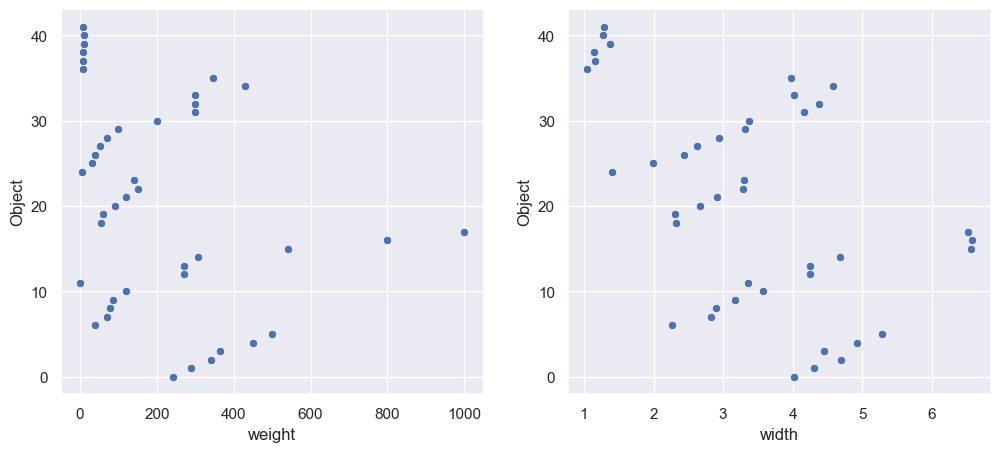

In [75]:
# For more understanding of cv values
plt.figure(figsize=[12,5])

plt.subplot(121)
sns.scatterplot(
    data=df_numeric,
    x="weight",
    y=df_numeric.index
                )
plt.ylabel("Object")

plt.subplot(122)
sns.scatterplot(
    data=df_numeric,
    x="width",
    y=df_numeric.index
                )
plt.ylabel("Object")

plt.show()

## Describe Dataframe

In [86]:
# Describe Dataframe
(df
 .describe()
 .style
 .set_caption("Statistic summary of the dataframe")
 .background_gradient(cmap="Set2")
 .format(precision=2)
 .set_properties(**{"border" : "2px dashed black", "color" : "black"})
)

,weight,height,width,fish_Bream,fish_Parkki,fish_Perch,fish_Pike,fish_Roach,fish_Smelt,fish_Whitefish
count,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00
mean,204.85,6.90,3.38,0.14,0.14,0.14,0.14,0.14,0.14,0.14
std,220.38,3.57,1.46,0.35,0.35,0.35,0.35,0.35,0.35,0.35
min,0.00,1.73,1.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,42.88,4.59,2.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,120.00,6.34,3.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,300.00,8.72,4.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1000.00,14.18,6.57,1.00,1.00,1.00,1.00,1.00,1.00,1.00


**Insight:**
- There are 42 data in this dataframe.
- The amount of mean and median are almost equal for all the features except 'weight', in which we can see positive skewness.
- 'weight' data have a wide range of 1000

## Skewness of Box Plots

In [88]:
# Find skewness function
def find_skewness(dataframe, feature_name: str) -> None:
    """ Using q1, q2 and q3 quartiles for a specific feature, determines type of skewness and draw box plot."""

    mean = dataframe[feature_name].mean()
    median = dataframe[feature_name].median()

    q1 = dataframe[feature_name].quantile(0.25)
    q2 = dataframe[feature_name].quantile(0.5)
    q3 = dataframe[feature_name].quantile(0.75)

    print(f"The mean of '{feature_name}' is {mean}")
    print(f"The median of '{feature_name}' is {median}")

    if q2-q1 == q3-q2:    # median == mean
        print(f"median == mean: {median == mean}")
        print("Normal Distribution")
    elif q2-q1 > q3-q2:    # median > mean
        print(f"median > mean: {median > mean}")
        print("Negative Skewness")
    else: # q2-q1 < q3-q2   # median < mean
        print(f"median < mean: {median < mean}")
        print("Positive Skewness")
    print()

    sns.boxplot(data=dataframe, x=feature_name)
    plt.show()
    print()

The mean of 'weight' is 204.85238095238094
The median of 'weight' is 120.0
median < mean: True
Positive Skewness



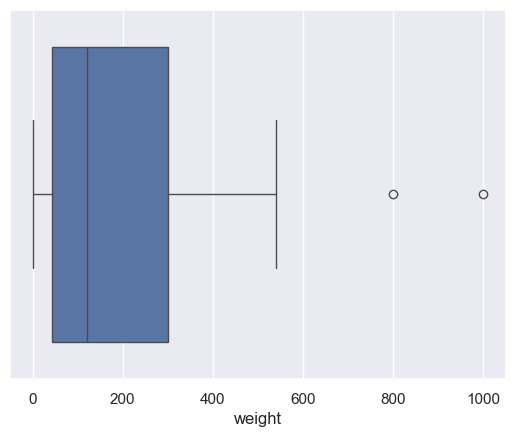


The mean of 'height' is 6.899621428571429
The median of 'height' is 6.3422
median < mean: True
Positive Skewness



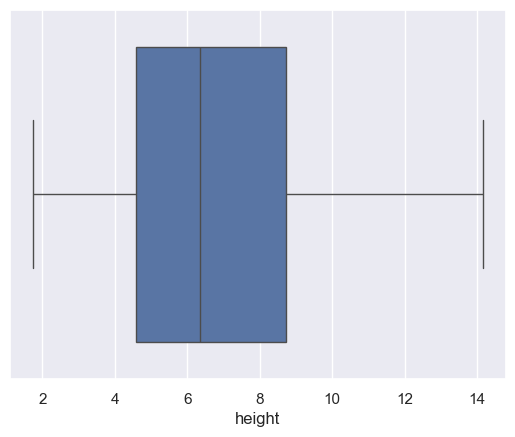


The mean of 'width' is 3.3799642857142853
The median of 'width' is 3.308
median < mean: True
Positive Skewness



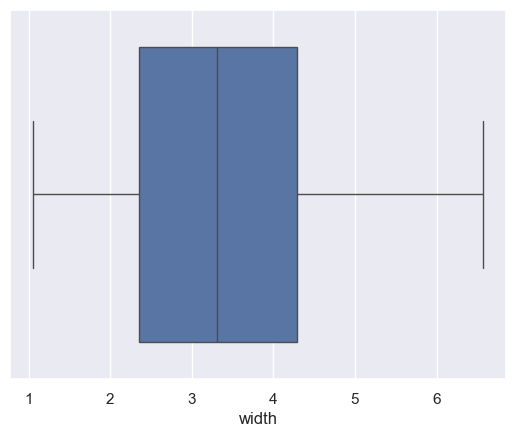

In [89]:
# Calling find_skewness function for each feature
for column in df_numeric.columns:
    find_skewness(dataframe=df_numeric, feature_name=column)

**Here we can see:**
- Nearly normal distribution for 'height' and 'width'.
- There are some outliers in 'weight' data.
- Positive skewness for 'weight' and 'height'.

## Are Data Balanced?

In [90]:
# Value counts for species
data_balance_checking = df.value_counts(subset=["species"])
data_balance_checking

species  
Bream        6
Parkki       6
Perch        6
Pike         6
Roach        6
Smelt        6
Whitefish    6
Name: count, dtype: int64

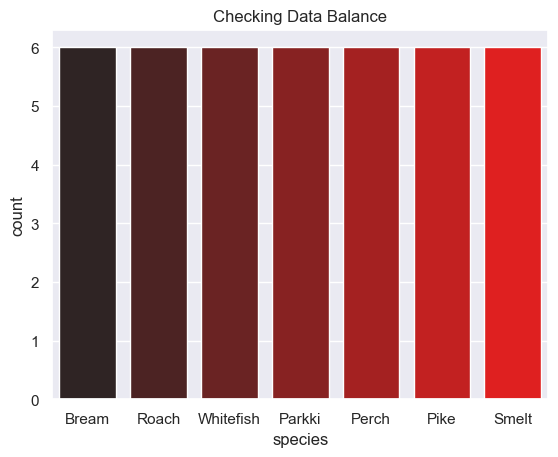

In [92]:
# Data balance count plot
sns.countplot(data=df, x="species", hue="species", color="red")
plt.title("Checking Data Balance")
plt.show()

**Insight:**
- Data count is well-balanced

## Relation Between Features

### Using scatterplot

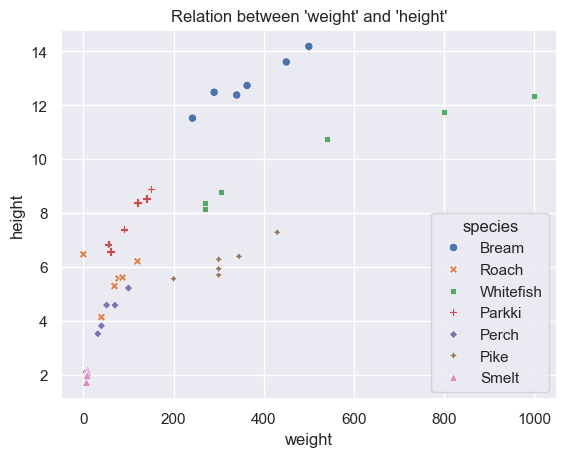

In [95]:
# Relation between 'weight' and 'height'
sns.scatterplot(
    data=df,
    x="weight",
    y="height",
    hue="species",
    style="species"
)
plt.title("Relation between 'weight' and 'height'")
plt.show()

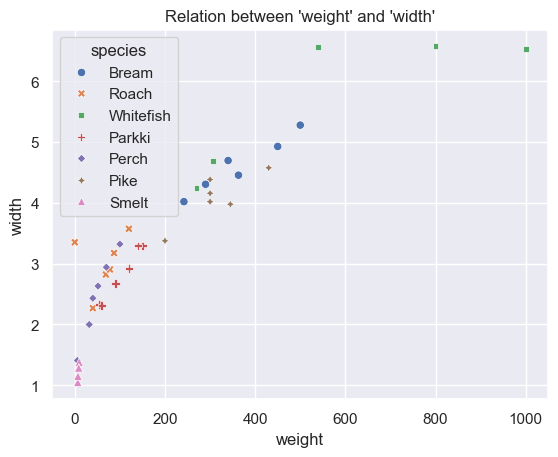

In [96]:
# Relation between 'weight' and 'width'
sns.scatterplot(
    data=df,
    x="weight",
    y="width",
    hue="species",
    style="species"
)
plt.title("Relation between 'weight' and 'width'")
plt.show()

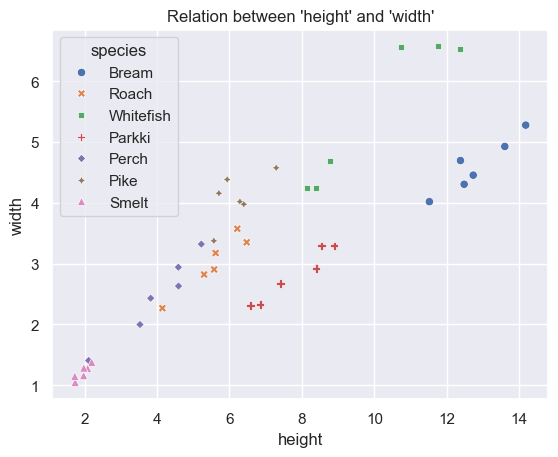

In [97]:
# Relation between 'height' and 'width'
sns.scatterplot(
    data=df,
    x="height",
    y="width",
    hue="species",
    style="species"
)
plt.title("Relation between 'height' and 'width'")
plt.show()

**Insight:**
- Linear dependency can be observed between 'Perch' and 'Roach'.
- The other species are almost separated from each other.
- Outliers can be seen.

### Using Pairplot

In [99]:
# Choosing features for pairplot
df.sample(5)

,weight,height,width,fish_Bream,fish_Parkki,fish_Perch,fish_Pike,fish_Roach,fish_Smelt,fish_Whitefish,species
21,120.0,8.3922,2.9181,0,1,0,0,0,0,0,Parkki
19,60.0,6.5772,2.3142,0,1,0,0,0,0,0,Parkki
33,300.0,6.2884,4.0198,0,0,0,1,0,0,0,Pike
23,140.0,8.5376,3.2944,0,1,0,0,0,0,0,Parkki
32,300.0,5.9364,4.3844,0,0,0,1,0,0,0,Pike


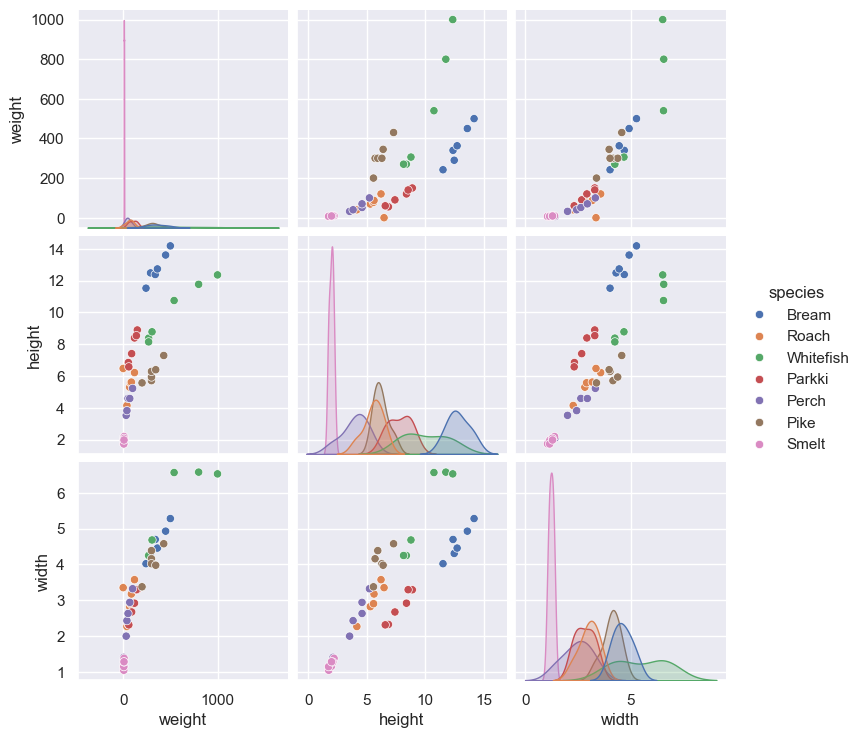

In [101]:
# Drawing pairplot
sns.pairplot(
    data=df.iloc[:, [0,1,2,10]],
    hue="species"
)
plt.show()

**Insight:**
- For all the features, we can see normal distribution for all seven species.
- For all the features, we can see high kurtosis for 'Smelt'.
- For all the features, we can see low kurtosis for 'Whitefish'.
- For all the features, 'Smelt' is distributed separately from other species.
- For all the features, there is linear dependency between 'Perch' and 'Roach'.
- For 'width', in addition to 'Perch' and 'Roach' and 'Parkki', we can also see linear dependency between 'Bream' and 'Pike'.
- For all the features, outliers can be seen.

### Parallel Coordinates

In [102]:
# Choosing feartures for parallel coordinates
df.columns.tolist()

['weight',
 'height',
 'width',
 'fish_Bream',
 'fish_Parkki',
 'fish_Perch',
 'fish_Pike',
 'fish_Roach',
 'fish_Smelt',
 'fish_Whitefish',
 'species']

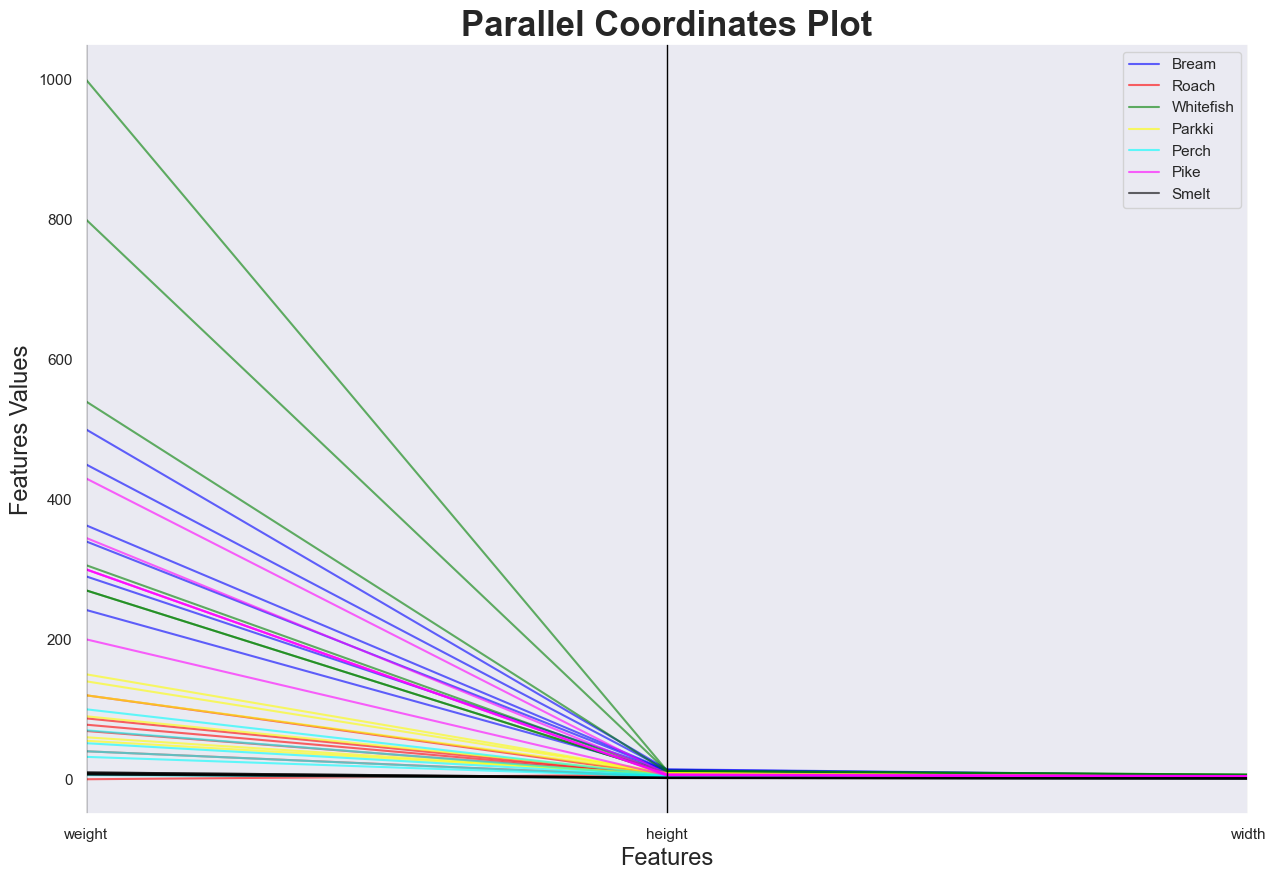

In [106]:
# Drawing parallel coordinates plot
plt.figure(figsize=[15, 10])
pd.plotting.parallel_coordinates(
    frame=df,
    class_column="species",
    cols=df.columns[:3],
    color=["blue", "red", "green", "yellow", "cyan", "magenta", "black"],
    alpha=0.6
)

plt.title("Parallel Coordinates Plot", fontsize=25, fontweight="bold")
plt.xlabel("Features", fontsize=17)
plt.ylabel("Features Values", fontsize=17)
plt.show()

**Here we can see:**
- For 'weight', outliers can be seen.
- Feature values for 'height' and 'width' are so close to each other, so range of values is low. However, for 'weight', values are far from each other and range of values is high.
- Values of 'Whitefish' is higher than the other species for all the features.

## Correlation Between Features

In [107]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Styling correlation matrix
styled_correlation_matrix = (correlation_matrix
                             .style
                             .background_gradient(cmap="coolwarm")
                             .format(precision=2)
                            )
styled_correlation_matrix

,weight,height,width,fish_Bream,fish_Parkki,fish_Perch,fish_Pike,fish_Roach,fish_Smelt,fish_Whitefish
weight,1.00,0.75,0.91,0.30,-0.19,-0.29,0.20,-0.26,-0.37,0.61
height,0.75,1.00,0.85,0.68,0.10,-0.34,-0.08,-0.16,-0.57,0.36
width,0.91,0.85,1.00,0.35,-0.16,-0.26,0.20,-0.10,-0.61,0.59
fish_Bream,0.30,0.68,0.35,1.00,-0.17,-0.17,-0.17,-0.17,-0.17,-0.17
fish_Parkki,-0.19,0.10,-0.16,-0.17,1.00,-0.17,-0.17,-0.17,-0.17,-0.17
fish_Perch,-0.29,-0.34,-0.26,-0.17,-0.17,1.00,-0.17,-0.17,-0.17,-0.17
fish_Pike,0.20,-0.08,0.20,-0.17,-0.17,-0.17,1.00,-0.17,-0.17,-0.17
fish_Roach,-0.26,-0.16,-0.10,-0.17,-0.17,-0.17,-0.17,1.00,-0.17,-0.17
fish_Smelt,-0.37,-0.57,-0.61,-0.17,-0.17,-0.17,-0.17,-0.17,1.00,-0.17
fish_Whitefish,0.61,0.36,0.59,-0.17,-0.17,-0.17,-0.17,-0.17,-0.17,1.00


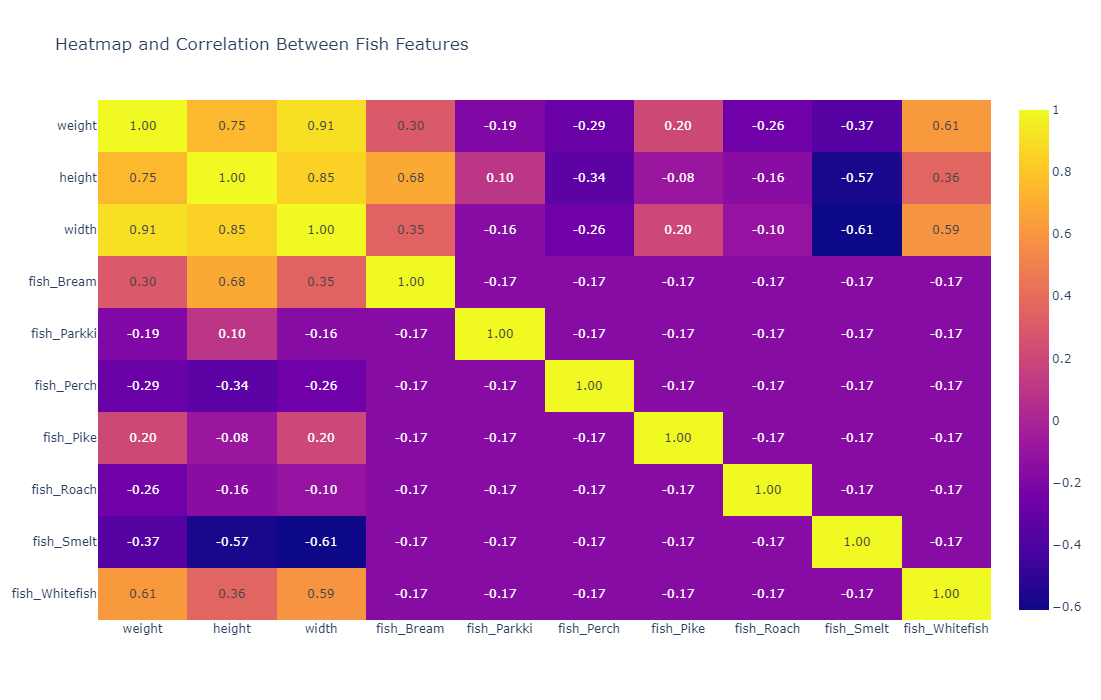

In [111]:
# Correlation heatmap using plotly imshow
heatmap = px.imshow(
    img = correlation_matrix, 
    text_auto = ".2f",
    title = "Heatmap and Correlation Between Fish Features",
    aspect = "auto",
    width = 700,  # The figure width in pixels. 
    height = 700, # The figure height in pixels.
)
heatmap.show()

**Insight:**

These pairs have high linear dependency to each other:
- 'weight' and 'width',
- 'weight' and 'height',
- 'height' and 'width',
- 'height' and 'fish_Bream',
- 'weight' and 'fish_Whitefish',
- 'width' and 'fish_Whitefish'.

## Outliers Detection

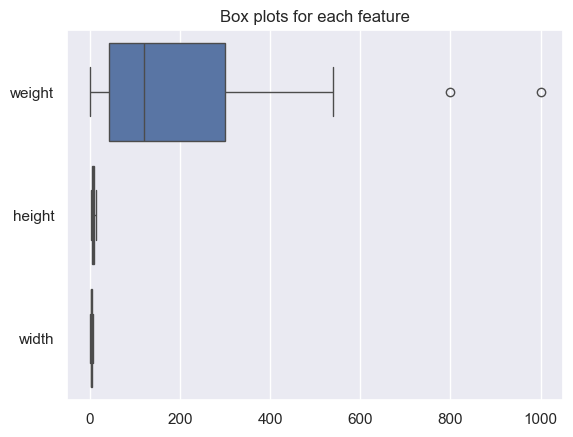

In [112]:
# Box plots for each feature as a general view
plt.title("Box plots for each feature")
sns.boxplot(
    data=df.iloc[:, :3],
    orient="h"
            )
plt.show()

In [118]:
# Box and whisker plot function
def box_and_whisker_plots(dataframe, feature_name: str, target: str) -> None:
    '''
    Drawing box and whisker plots to demonstrate distribution of a specific feature based on target values.
    '''
    plt.figure(figsize=[8, 6])
    plt.title(f"Box and whisker plot for distribution of '{feature_name}' based on '{target}'")
    sns.boxplot(
        data=dataframe,
        x=feature_name,
        y=target,
        medianprops={"linewidth" : 2, "linestyle" : "dashed"},
        hue=target
                )
    plt.show()

In [119]:
# Turning feature values into zscore values
from scipy import stats
zscores = [stats.zscore(df[feature]) for feature in df.columns[:3]]
len(zscores), type(zscores)

(3, list)

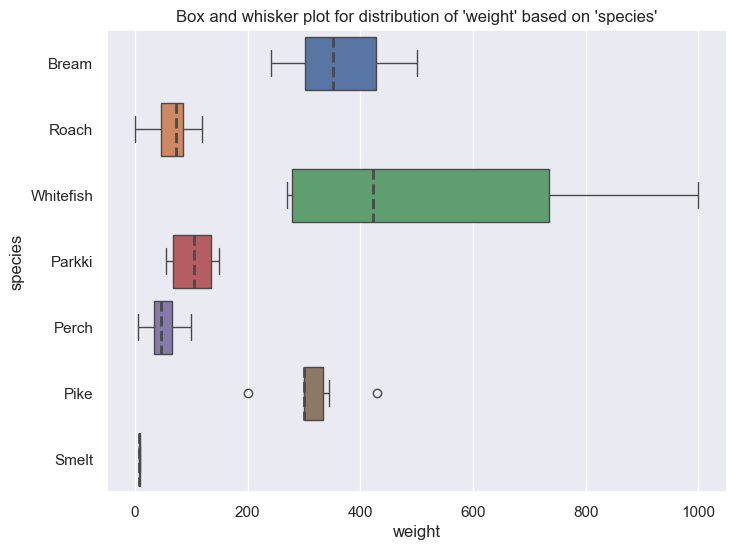

In [120]:
# Box and whisker plot function for 'weight' based on fish species
zscore_weight = zscores[0]
box_and_whisker_plots(
    dataframe=df,
    feature_name="weight",
    target="species"
                     )

In [121]:
# Outliers using box plot and zscore for 'weight'
outlier_weight = df[np.abs(zscore_weight) > 3]
outlier_weight

,weight,height,width,fish_Bream,fish_Parkki,fish_Perch,fish_Pike,fish_Roach,fish_Smelt,fish_Whitefish,species
17,1000.0,12.354,6.525,0,0,0,0,0,0,1,Whitefish


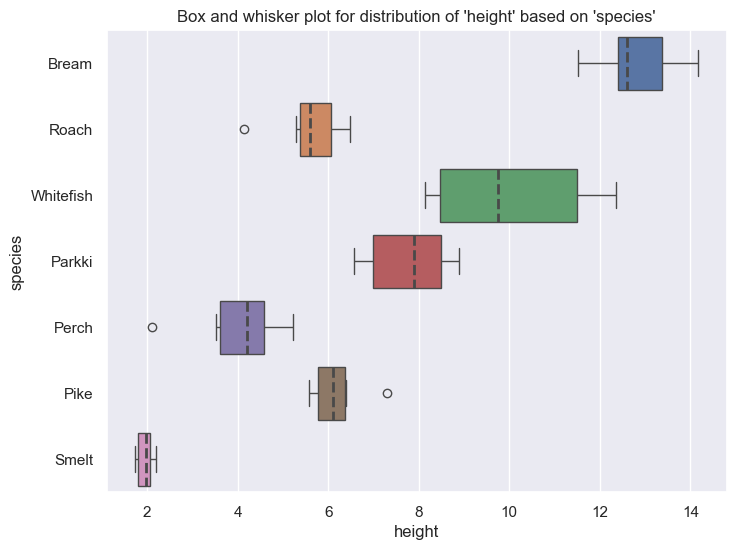

In [122]:
# Box and whisker plot function for 'height' based on species
zscore_height = zscores[1]
box_and_whisker_plots(
    dataframe=df,
    feature_name="height",
    target="species"
                     )

In [123]:
# Outliers using box plot and zscore for 'sepal_width'
outlier_height = df[np.abs(zscore_height) > 3]
outlier_height

,weight,height,width,fish_Bream,fish_Parkki,fish_Perch,fish_Pike,fish_Roach,fish_Smelt,fish_Whitefish,species


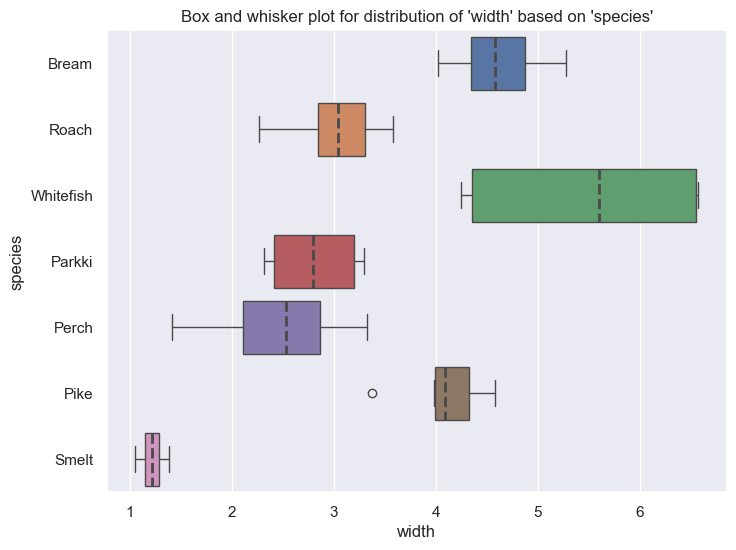

In [124]:
# Box and whisker plot function for 'width' based on species
zscore_width = zscores[2]
box_and_whisker_plots(
    dataframe=df,
    feature_name="width",
    target="species"
                     )

In [125]:
# Outliers using box plot and zscore for 'petal_length'
outlier_width = df[np.abs(zscore_width) > 3]
outlier_width

,weight,height,width,fish_Bream,fish_Parkki,fish_Perch,fish_Pike,fish_Roach,fish_Smelt,fish_Whitefish,species


In [126]:
# Collection of outliers using box plot and zscore
out_ind_using_boxplot_zscore = pd.concat([outlier_weight, outlier_height, outlier_width], axis=0)
out_ind_using_boxplot_zscore

,weight,height,width,fish_Bream,fish_Parkki,fish_Perch,fish_Pike,fish_Roach,fish_Smelt,fish_Whitefish,species
17,1000.0,12.354,6.525,0,0,0,0,0,0,1,Whitefish


In [127]:
# Outlier indices function using 3*sigma based on normal distribution
def find_outlier_index_using_3sigma(dataframe) -> list:
    '''
    Finding outlier indices using 3*sigma based on normal distribution.
    '''
    features = ["weight", "height", "width"]
    labels = ["Bream", "Parkki", "Perch", "Pike", "Roach", "Smelt", "Whitefish"]

    outlier_index_3sigma = list()
    for feature in features:
        for label in labels:
            df_specy = df.query("species == @label")
            selected_column = df_specy[feature]
            
            mu = selected_column.mean()
            sigma = selected_column.std()
            lower_limit = mu - 3 * sigma
            upper_limit = mu + 3 * sigma
            
            mask = (selected_column < lower_limit)|(selected_column > upper_limit)
            outliers = selected_column[mask]
            outlier_indices = outliers.index
            # print(outlier_indices)    Debugging
            
            if len(outlier_indices) == 0: continue
            print(f"{feature:15},\t{label:15},\t outlier indices={outlier_indices.values}")
            outlier_index_3sigma.extend(outlier_indices)
            
    return outlier_index_3sigma

### Driver Code ###
out_ind_3sigma = find_outlier_index_using_3sigma(df)
out_ind_3sigma

[]

In [128]:
# Outlier indices function using iqr
def find_outlier_index_using_iqr(dataframe) -> list:
    '''
    Finding outlier indices using iqr.
    '''
    features = ["weight", "height", "width"]
    labels = ["Bream", "Parkki", "Perch", "Pike", "Roach", "Smelt", "Whitefish"]

    outlier_index_iqr = list()
    for feature in features:
        for label in labels:
            df_specy = df.query("species == @label")
            selected_column = df_specy[feature]
            
            q1 = selected_column.quantile(0.25)    # First quartile
            q3 = selected_column.quantile(0.75)    # Third quartile
            iqr = q3 - q1
            lower_limit = q1 - 1.5 * iqr
            upper_limit = q3 + 1.5 * iqr
            
            mask = (selected_column < lower_limit)|(selected_column > upper_limit)
            outliers = selected_column[mask]
            outlier_indices = outliers.index
            
            if len(outlier_indices) == 0: continue
            print(f"{feature:15},\t{label:15},\t outlier indices={outlier_indices.values}")
            outlier_index_iqr.extend(outlier_indices)
            
    return outlier_index_iqr

### Driver Code ###
out_ind_iqr = find_outlier_index_using_iqr(df)
out_ind_iqr

weight         ,	Pike           ,	 outlier indices=[30 34]
height         ,	Perch          ,	 outlier indices=[24]
height         ,	Pike           ,	 outlier indices=[34]
height         ,	Roach          ,	 outlier indices=[6]
width          ,	Pike           ,	 outlier indices=[30]


[30, 34, 24, 34, 6, 30]

In [129]:
# Turning outlier list into set and obtaining intersection of two sets
final_outlier_indices = set(out_ind_3sigma) & set(out_ind_iqr) & set(out_ind_using_boxplot_zscore.index)
final_outlier_indices

set()

So There is no outlier to drop

In [131]:
# Dropping outliers
df_clean = df
df_clean.shape

(42, 11)

In [132]:
df_clean.sample(5)

,weight,height,width,fish_Bream,fish_Parkki,fish_Perch,fish_Pike,fish_Roach,fish_Smelt,fish_Whitefish,species
32,300.0,5.9364,4.3844,0,0,0,1,0,0,0,Pike
33,300.0,6.2884,4.0198,0,0,0,1,0,0,0,Pike
36,6.7,1.7388,1.0476,0,0,0,0,0,1,0,Smelt
14,306.0,8.7780,4.6816,0,0,0,0,0,0,1,Whitefish
41,8.7,1.9782,1.2852,0,0,0,0,0,1,0,Smelt


## Feature Scalling

In [133]:
# Investigating feature ranges for checking of feature scalling
print("Feature Ranges:")
for col in df.columns[:3]:
    print(f"{col}: {round(df[col].max() - df[col].min(), 1)}")

Feature Ranges:
weight: 1000.0
height: 12.5
width: 5.5


**Note:**

Because of the range of 'weight' and since all the features are **not** in a same order of magnitude, data would need feature scalling.

## Distribution Plot

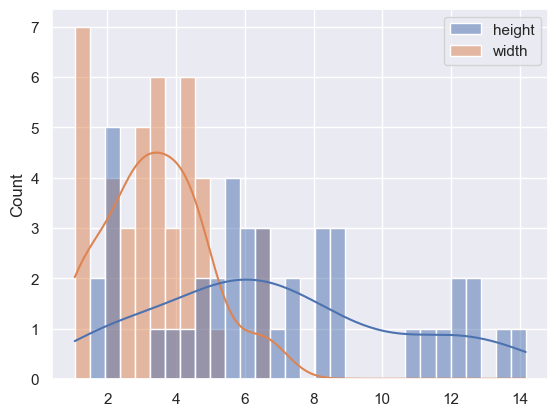

In [145]:
# Drawing distribution plot for 'height' and 'width'
sns.histplot(
    data=df_clean.iloc[:, 1:3],
    bins=30,
    kde=True
            )
plt.show()

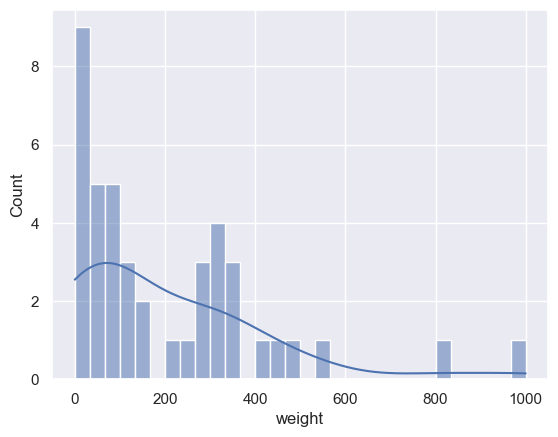

In [144]:
# Drawing distribution plot for 'weight'
sns.histplot(
    data=df_clean["weight"],
    bins=30,
    kde=True
            )
plt.show()

**Insight**
- Distribution plot for 'height' and 'width' is very similar to normal distribution.
- Distribution plot for 'weight' is not a normal distribution.